# The following file contains:
### -> Data extraction, cleaning
### -> Exploratory data analysis
### -> Feature building

# Data extraction from sql database

In [56]:
from dotenv import load_dotenv
import os
load_dotenv()
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# SQL server connection
from pangres import upsert
from sqlalchemy import text, create_engine

api_key = os.environ.get('riot_api_key')

db_username = os.environ.get('db_username')
db_password = os.environ.get('db_password')
db_host = os.environ.get('db_host')
db_port = os.environ.get('db_port')
db_name = os.environ.get('db_name')

def create_db_connection(db_username, db_password, db_host, db_port, db_name):
    connection_url = 'postgresql+psycopg2://'+db_username+':'+db_password+'@'+db_host+':'+db_port+'/'+db_name
    return connection_url

connection_url = create_db_connection(db_username, db_password, db_host, db_port, db_name)
db_engine = create_engine(connection_url, pool_recycle=3600) # create a connection that resets after one hour


with db_engine.connect() as connection:
    df = pd.read_sql(text('select * from matches_schema.match_i'), connection)

pd.set_option('display.max_columns',200)

# Exploratory data analysis

### Data Description

In [57]:
df.shape # Total row and columns

(8460, 63)

In [58]:
df.head() # Gives first rows of the dataset

,uuid,match_id,participants,champLevel,championId,championName,role,lane,goldEarned,goldSpent,longestTimeSpentLiving,individualPosition,teamPosition,puuid,summonerId,kills,deaths,assists,firstBloodKill,firstBloodAssist,doubleKills,tripleKills,quadraKills,largestKillingSpree,largestMultiKill,totalDamageDealtToChampions,totalDamageDealt,totalDamageTaken,damageDealtToObjectives,damageDealtToBuildings,damageDealtToTurrets,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,inhibitorKills,inhibitorTakedowns,inhibitorsLost,nexusKills,nexusTakedowns,nexusLost,turretKills,turretTakedowns,turretsLost,objectivesStolen,objectivesStolenAssists,baronKills,dragonKills,item0,item1,item2,item3,item4,item5,item6,gameEndedInEarlySurrender,gameEndedInSurrender,win
0,EUW1_7282943064_xwacPtI563NFqJYSLl-3NIgXDW281H...,EUW1_7282943064,[xwacPtI563NFqJYSLl-3NIgXDW281HAYcp4uej4pEmdsq...,18,126,Jayce,SOLO,TOP,17711,16675,487,TOP,TOP,xwacPtI563NFqJYSLl-3NIgXDW281HAYcp4uej4pEmdsq_...,QD7iEM5eno8stFxYnri7hDOwQP7_DJEltFkyX6rn5eJDL-lH,9,14,10,False,False,1,1,0,3,3,45499,308050,57110,11119,11119,11119,40550,13554,33205,263799,31706,20899,3700,238,3005,1,1,3,0,1,0,3,5,9,0,0,0,0,6698,3042,3134,6694,3161,3173,3363,False,False,True
1,EUW1_7283388818_zr0Yoez3M6OVjT1aRZibrwM-HTvmmm...,EUW1_7283388818,[zr0Yoez3M6OVjT1aRZibrwM-HTvmmmYjPy-vD5C5XXBlG...,14,23,Tryndamere,SOLO,TOP,10765,9900,285,TOP,TOP,zr0Yoez3M6OVjT1aRZibrwM-HTvmmmYjPy-vD5C5XXBlGC...,nugCVKdS-so0gw08y3D4zzPs9bIFPL64-sFrnr_o23Ib7Pw,3,8,0,True,False,0,0,0,0,1,10406,161686,28830,11906,6464,6464,0,0,13902,157414,9107,14724,4272,1298,203,0,0,1,0,0,1,2,2,8,0,0,0,0,6698,1055,3111,6676,1018,1038,3340,False,False,False
2,EUW1_7284047318_NBfFpHXsZqmiYubxwXfQuXslhGKJ21...,EUW1_7284047318,[NBfFpHXsZqmiYubxwXfQuXslhGKJ21csXt1aKCyqQlIc_...,1,875,Sett,SUPPORT,NONE,588,500,0,TOP,TOP,NBfFpHXsZqmiYubxwXfQuXslhGKJ21csXt1aKCyqQlIc_r...,mwNw2Jm4qJ1z71Ib0RFJNsHSJrBTAltXWRLxPS40wAnnNSZW,0,0,0,False,False,0,0,0,0,0,0,808,25,0,0,0,0,0,0,568,0,25,240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1055,2003,0,0,0,0,3340,True,False,True
3,EUW1_7278340161_ZdSws3NbiKvjt6tCr-QtUpB5eoAV8G...,EUW1_7278340161,[ZdSws3NbiKvjt6tCr-QtUpB5eoAV8GRxioEp19agNBtGL...,18,31,Chogath,SOLO,TOP,14881,14400,728,TOP,TOP,ZdSws3NbiKvjt6tCr-QtUpB5eoAV8GRxioEp19agNBtGLc...,tV06OZ5iMR0qttqg_CEk4HZEOy0gK5URQz_EItS7nF-rbcgx,2,2,7,False,False,0,0,0,0,1,21857,269229,55920,19518,14126,14126,189533,15709,23786,35781,3169,30116,43914,2977,2017,1,2,1,0,0,0,6,6,5,0,0,0,1,2502,6657,6664,3173,3084,0,3340,False,True,True
4,EUW1_7275928530_F1BCO6dxT_SHvgHa4M3xZQUZnu_llJ...,EUW1_7275928530,[F1BCO6dxT_SHvgHa4M3xZQUZnu_llJgIv66MXtINsV2rn...,14,777,Yone,NONE,JUNGLE,9027,8550,367,TOP,TOP,F1BCO6dxT_SHvgHa4M3xZQUZnu_llJgIv66MXtINsV2rnU...,-ncUT640ZGgPEKBaDmRGYlwdqnMeZXniQCZmj977pLu71VY,2,8,6,True,False,0,0,0,0,1,17035,124325,22887,5166,5166,5166,14507,3469,3150,93672,12225,18996,16144,1339,740,0,0,2,0,0,1,1,1,9,0,0,0,0,3153,6673,2031,3006,1018,1055,3340,False,False,False


In [59]:
df.tail() # Gives last rows of the dataset

,uuid,match_id,participants,champLevel,championId,championName,role,lane,goldEarned,goldSpent,longestTimeSpentLiving,individualPosition,teamPosition,puuid,summonerId,kills,deaths,assists,firstBloodKill,firstBloodAssist,doubleKills,tripleKills,quadraKills,largestKillingSpree,largestMultiKill,totalDamageDealtToChampions,totalDamageDealt,totalDamageTaken,damageDealtToObjectives,damageDealtToBuildings,damageDealtToTurrets,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,inhibitorKills,inhibitorTakedowns,inhibitorsLost,nexusKills,nexusTakedowns,nexusLost,turretKills,turretTakedowns,turretsLost,objectivesStolen,objectivesStolenAssists,baronKills,dragonKills,item0,item1,item2,item3,item4,item5,item6,gameEndedInEarlySurrender,gameEndedInSurrender,win
8455,EUW1_7280695430_wAIL6Uo-3I3BezfG018HE76rMc_kMZ...,EUW1_7280695430,[wAIL6Uo-3I3BezfG018HE76rMc_kMZYU_pTV4-2xbEQ5-...,13,57,Maokai,SUPPORT,NONE,6896,6025,210,TOP,TOP,wAIL6Uo-3I3BezfG018HE76rMc_kMZYU_pTV4-2xbEQ5-E...,rBHNJwLvlYXNbtSQpoP2JTz7bz5Uisu2FY3VRlhLnM7G3u3q,5,2,1,False,False,0,0,0,5,1,12634,73504,17313,3852,3578,3578,55859,9590,233,17057,3044,17080,588,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1054,3047,2502,3070,1011,0,3340,False,True,True
8456,EUW1_7283115286_Fmd8ReQwhKAQpIFsAaInchonjLGIHm...,EUW1_7283115286,[Fmd8ReQwhKAQpIFsAaInchonjLGIHm1Tji_fPtk5w6wGj...,18,58,Renekton,DUO,TOP,16020,13850,572,TOP,TOP,Fmd8ReQwhKAQpIFsAaInchonjLGIHm1Tji_fPtk5w6wGje...,wjJC9U9H5fhu_c-70EpV-ulom7Tgxn0gZdx9KRWXqs4bsSY,11,7,12,False,False,2,1,0,4,3,37755,218838,60086,8932,7168,7168,16857,8981,21880,199579,28671,31345,2402,102,6861,0,2,0,0,1,0,1,5,6,0,0,0,0,3174,1037,6333,3071,3053,1036,3340,False,False,True
8457,EUW1_7282766849_VGxFMmUl7GAKbnckUIR7Lk4WGNon4P...,EUW1_7282766849,[VGxFMmUl7GAKbnckUIR7Lk4WGNon4PAZV22KSqlosEygw...,16,164,Camille,SOLO,TOP,12900,12558,252,TOP,TOP,VGxFMmUl7GAKbnckUIR7Lk4WGNon4PAZV22KSqlosEygwh...,AyM9nL7-5YVLTY0kXgX6tExrHtV8qSw0q7leAm7-275Cml...,7,10,6,True,False,0,0,0,0,1,26339,165697,43787,12004,5354,5354,2007,2007,13336,130681,15514,29669,33007,8817,781,0,0,3,0,0,1,2,2,11,0,0,0,0,3053,3074,1036,3078,3111,1037,3340,False,False,False
8458,EUW1_7283081936_wbGOEr_0Vf0OGE6mTvRuHH2fIWTqbv...,EUW1_7283081936,[wbGOEr_0Vf0OGE6mTvRuHH2fIWTqbvsdUUMRy9qedqAOW...,15,92,Riven,SOLO,TOP,9531,8220,748,TOP,TOP,wbGOEr_0Vf0OGE6mTvRuHH2fIWTqbvsdUUMRy9qedqAOWK...,xcQHj3PUdRE8yDn7vxQsmEawF9CWpt3MBuVqa5nVfGD1f3o,3,3,4,False,True,0,0,0,2,1,12384,117761,12794,4166,4166,4166,0,0,2161,106784,12003,9485,10976,381,1147,0,0,0,0,0,0,1,1,4,0,0,0,0,6692,6333,3047,1028,0,0,3340,False,True,True
8459,EUW1_7283770434_6T8q77Onnnl9q-1osgsqR-Uh_HS7pd...,EUW1_7283770434,[6T8q77Onnnl9q-1osgsqR-Uh_HS7pdPM6TKdkGQmUKKuh...,6,8,Vladimir,SUPPORT,NONE,2172,1475,0,TOP,TOP,6T8q77Onnnl9q-1osgsqR-Uh_HS7pdPM6TKdkGQmUKKuhY...,4ZI3-5KuDtsoJSdkCL1ueMZ7fEQNNxoLcggpKw0iP9hUDe...,0,0,1,False,False,0,0,0,0,0,2241,13456,2175,0,0,0,10894,1953,115,2561,287,2059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3158,0,0,1056,0,0,3340,False,True,True


In [60]:
df.describe() # Give numerical description of the table

,champLevel,championId,goldEarned,goldSpent,longestTimeSpentLiving,kills,deaths,assists,doubleKills,tripleKills,quadraKills,largestKillingSpree,largestMultiKill,totalDamageDealtToChampions,totalDamageDealt,totalDamageTaken,damageDealtToObjectives,damageDealtToBuildings,damageDealtToTurrets,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,inhibitorKills,inhibitorTakedowns,inhibitorsLost,nexusKills,nexusTakedowns,nexusLost,turretKills,turretTakedowns,turretsLost,objectivesStolen,objectivesStolenAssists,baronKills,dragonKills,item0,item1,item2,item3,item4,item5,item6
count,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.00000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000
mean,15.544208,215.144563,11607.661702,10761.066430,541.823522,5.721513,5.900473,6.096099,0.457210,0.054728,0.007920,2.683806,1.309338,22999.95461,140088.912766,31158.436407,10524.076241,5459.030615,5459.030615,43341.847518,8872.615485,11599.653428,89175.840307,12422.861584,17642.368676,7570.435816,1703.760047,1915.458511,0.222813,0.487470,0.890071,0.084043,0.269740,0.489362,1.670449,2.493735,5.536170,0.012884,0.007683,0.021868,0.085225,3143.200236,3663.033097,3301.582624,3174.599764,2493.541135,1626.311939,3310.556265
std,3.342534,283.891826,3874.581331,3766.756872,301.368577,4.261600,3.449091,5.483728,0.826153,0.258137,0.095079,2.386251,0.687952,12646.63459,67190.324927,15610.337006,9880.667568,4543.394084,4543.394084,56783.603874,11241.944696,7920.650547,70447.020671,10624.724043,9424.916030,9755.678322,2673.813962,2117.491009,0.537845,0.780244,1.207601,0.281696,0.450723,0.510215,1.600893,2.136844,3.749358,0.114859,0.087322,0.154131,0.336802,4833.999349,4169.637727,2141.780475,5411.447871,2296.509035,5214.238813,273.566735
min,1.000000,1.000000,501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,43.000000,9192.500000,8450.000000,342.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14339.75000,95063.000000,20748.250000,3581.000000,2073.750000,2073.750000,1117.500000,652.000000,5980.500000,24012.750000,3410.500000,11131.500000,1774.750000,68.000000,562.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1055.000000,3033.000000,3009.000000,2502.000000,1036.000000,0.000000,3340.000000
50%,16.000000,86.000000,11543.500000,10700.000000,497.000000,5.000000,6.000000,5.000000,0.000000,0.000000,0.000000,2.000000,1.000000,21006.00000,134330.000000,29550.000000,8066.000000,4431.000000,4431.000000,17154.000000,4426.000000,10243.500000,81371.000000,10510.000000,16448.000000,4458.000000,654.500000,1243.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3068.000000,3091.000000,3078.000000,3071.000000,3033.000000,1036.000000,3340.000000
75%,18.000000,166.000000,13979.750000,12983.000000,705.000000,8.000000,8.000000,8.000000,1.000000,0.000000,0.000000,4.000000,2.000000,29712.00000,177838.000000,39032.000000,14688.250000,7914.00000

In [61]:
df.columns

Index(['uuid', 'match_id', 'participants', 'champLevel', 'championId',
       'championName', 'role', 'lane', 'goldEarned', 'goldSpent',
       'longestTimeSpentLiving', 'individualPosition', 'teamPosition', 'puuid',
       'summonerId', 'kills', 'deaths', 'assists', 'firstBloodKill',
       'firstBloodAssist', 'doubleKills', 'tripleKills', 'quadraKills',
       'largestKillingSpree', 'largestMultiKill',
       'totalDamageDealtToChampions', 'totalDamageDealt', 'totalDamageTaken',
       'damageDealtToObjectives', 'damageDealtToBuildings',
       'damageDealtToTurrets', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'trueDamageDealt', 'trueDamageDealtToChampions',
       'trueDamageTaken', 'inhibitorKills', 'inhibitorTakedowns',
       'inhibitorsLost', 'nexusKills', 'nexusTakedowns', 'nexusLost',
       'turretKills', 'turretTakedowns', 'turretsLost', 'objective

### Data Cleaning
    Removing irrelevent columns and rows
    Identifying duplicate columns
    Renaming columns
    Feature Creating(Numerical and Categorical Features)

In [62]:
# Removing unnesessary columns
df = df[['uuid', 'match_id', 'participants', 'champLevel', 'championId',
       'championName', 
       #'role', 
       #'lane',
       'goldEarned', 'goldSpent',
       'longestTimeSpentLiving', 'individualPosition', 'teamPosition', 
       'puuid',
       'summonerId', 'kills', 'deaths', 'assists', 'firstBloodKill',
       'firstBloodAssist', 'doubleKills', 'tripleKills', 'quadraKills',
       'largestKillingSpree', 'largestMultiKill',
       'totalDamageDealtToChampions', 'totalDamageDealt', 'totalDamageTaken',
       'damageDealtToObjectives', 'damageDealtToBuildings',
       'damageDealtToTurrets', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'trueDamageDealt', 'trueDamageDealtToChampions',
       'trueDamageTaken', 'inhibitorKills', 'inhibitorTakedowns',
       'inhibitorsLost', 'nexusKills', 'nexusTakedowns', 'nexusLost',
       'turretKills', 'turretTakedowns', 'turretsLost', 'objectivesStolen',
       'objectivesStolenAssists', 'baronKills', 'dragonKills', 
       #'item0',
       #'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'gameEndedInEarlySurrender',
       'gameEndedInSurrender', 'win']].copy()

In [63]:
# Checking null values
df.isnull().sum()

uuid                              0
match_id                          0
participants                      0
champLevel                        0
championId                        0
championName                      0
goldEarned                        0
goldSpent                         0
longestTimeSpentLiving            0
individualPosition                0
teamPosition                      0
puuid                             0
summonerId                        0
kills                             0
deaths                            0
assists                           0
firstBloodKill                    0
firstBloodAssist                  0
doubleKills                       0
tripleKills                       0
quadraKills                       0
largestKillingSpree               0
largestMultiKill                  0
totalDamageDealtToChampions       0
totalDamageDealt                  0
totalDamageTaken                  0
damageDealtToObjectives           0
damageDealtToBuildings      

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8460 entries, 0 to 8459
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   uuid                            8460 non-null   object
 1   match_id                        8460 non-null   object
 2   participants                    8460 non-null   object
 3   champLevel                      8460 non-null   int64 
 4   championId                      8460 non-null   int64 
 5   championName                    8460 non-null   object
 6   goldEarned                      8460 non-null   int64 
 7   goldSpent                       8460 non-null   int64 
 8   longestTimeSpentLiving          8460 non-null   int64 
 9   individualPosition              8460 non-null   object
 10  teamPosition                    8460 non-null   object
 11  puuid                           8460 non-null   object
 12  summonerId                      8460 non-null   

#### Numerical features

In [65]:
num_feature = df.select_dtypes(include=np.number)
num_feature.duplicated().sum() # checking for duplicates
num_feature.describe() # describes the numerical data

,champLevel,championId,goldEarned,goldSpent,longestTimeSpentLiving,kills,deaths,assists,doubleKills,tripleKills,quadraKills,largestKillingSpree,largestMultiKill,totalDamageDealtToChampions,totalDamageDealt,totalDamageTaken,damageDealtToObjectives,damageDealtToBuildings,damageDealtToTurrets,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,inhibitorKills,inhibitorTakedowns,inhibitorsLost,nexusKills,nexusTakedowns,nexusLost,turretKills,turretTakedowns,turretsLost,objectivesStolen,objectivesStolenAssists,baronKills,dragonKills
count,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.00000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000
mean,15.544208,215.144563,11607.661702,10761.066430,541.823522,5.721513,5.900473,6.096099,0.457210,0.054728,0.007920,2.683806,1.309338,22999.95461,140088.912766,31158.436407,10524.076241,5459.030615,5459.030615,43341.847518,8872.615485,11599.653428,89175.840307,12422.861584,17642.368676,7570.435816,1703.760047,1915.458511,0.222813,0.487470,0.890071,0.084043,0.269740,0.489362,1.670449,2.493735,5.536170,0.012884,0.007683,0.021868,0.085225
std,3.342534,283.891826,3874.581331,3766.756872,301.368577,4.261600,3.449091,5.483728,0.826153,0.258137,0.095079,2.386251,0.687952,12646.63459,67190.324927,15610.337006,9880.667568,4543.394084,4543.394084,56783.603874,11241.944696,7920.650547,70447.020671,10624.724043,9424.916030,9755.678322,2673.813962,2117.491009,0.537845,0.780244,1.207601,0.281696,0.450723,0.510215,1.600893,2.136844,3.749358,0.114859,0.087322,0.154131,0.336802
min,1.000000,1.000000,501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,43.000000,9192.500000,8450.000000,342.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14339.75000,95063.000000,20748.250000,3581.000000,2073.750000,2073.750000,1117.500000,652.000000,5980.500000,24012.750000,3410.500000,11131.500000,1774.750000,68.000000,562.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,86.000000,11543.500000,10700.000000,497.000000,5.000000,6.000000,5.000000,0.000000,0.000000,0.000000,2.000000,1.000000,21006.00000,134330.000000,29550.000000,8066.000000,4431.000000,4431.000000,17154.000000,4426.000000,10243.500000,81371.000000,10510.000000,16448.000000,4458.000000,654.500000,1243.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,166.000000,13979.750000,12983.000000,705.000000,8.000000,8.000000,8.000000,1.000000,0.000000,0.000000,4.000000,2.000000,29712.00000,177838.000000,39032.000000,14688.250000,7914.000000,7914.000000,69508.250000,13209.000000,15566.500000,136331.750000,18550.250000,22707.250000,9641.250000,2085.250000,2512.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,950.000000,29108.000000,37846.000000,2674.000000,36.000000,25.000000,73.000000,8.000000,4.000000,3.000000,26.000000,5.000000,116896.00000,632365.000000,158456.000000,113861.000000,32652.000000,32652.000000,556518.000000,98267.000000,75027.000000,506320.000000,1

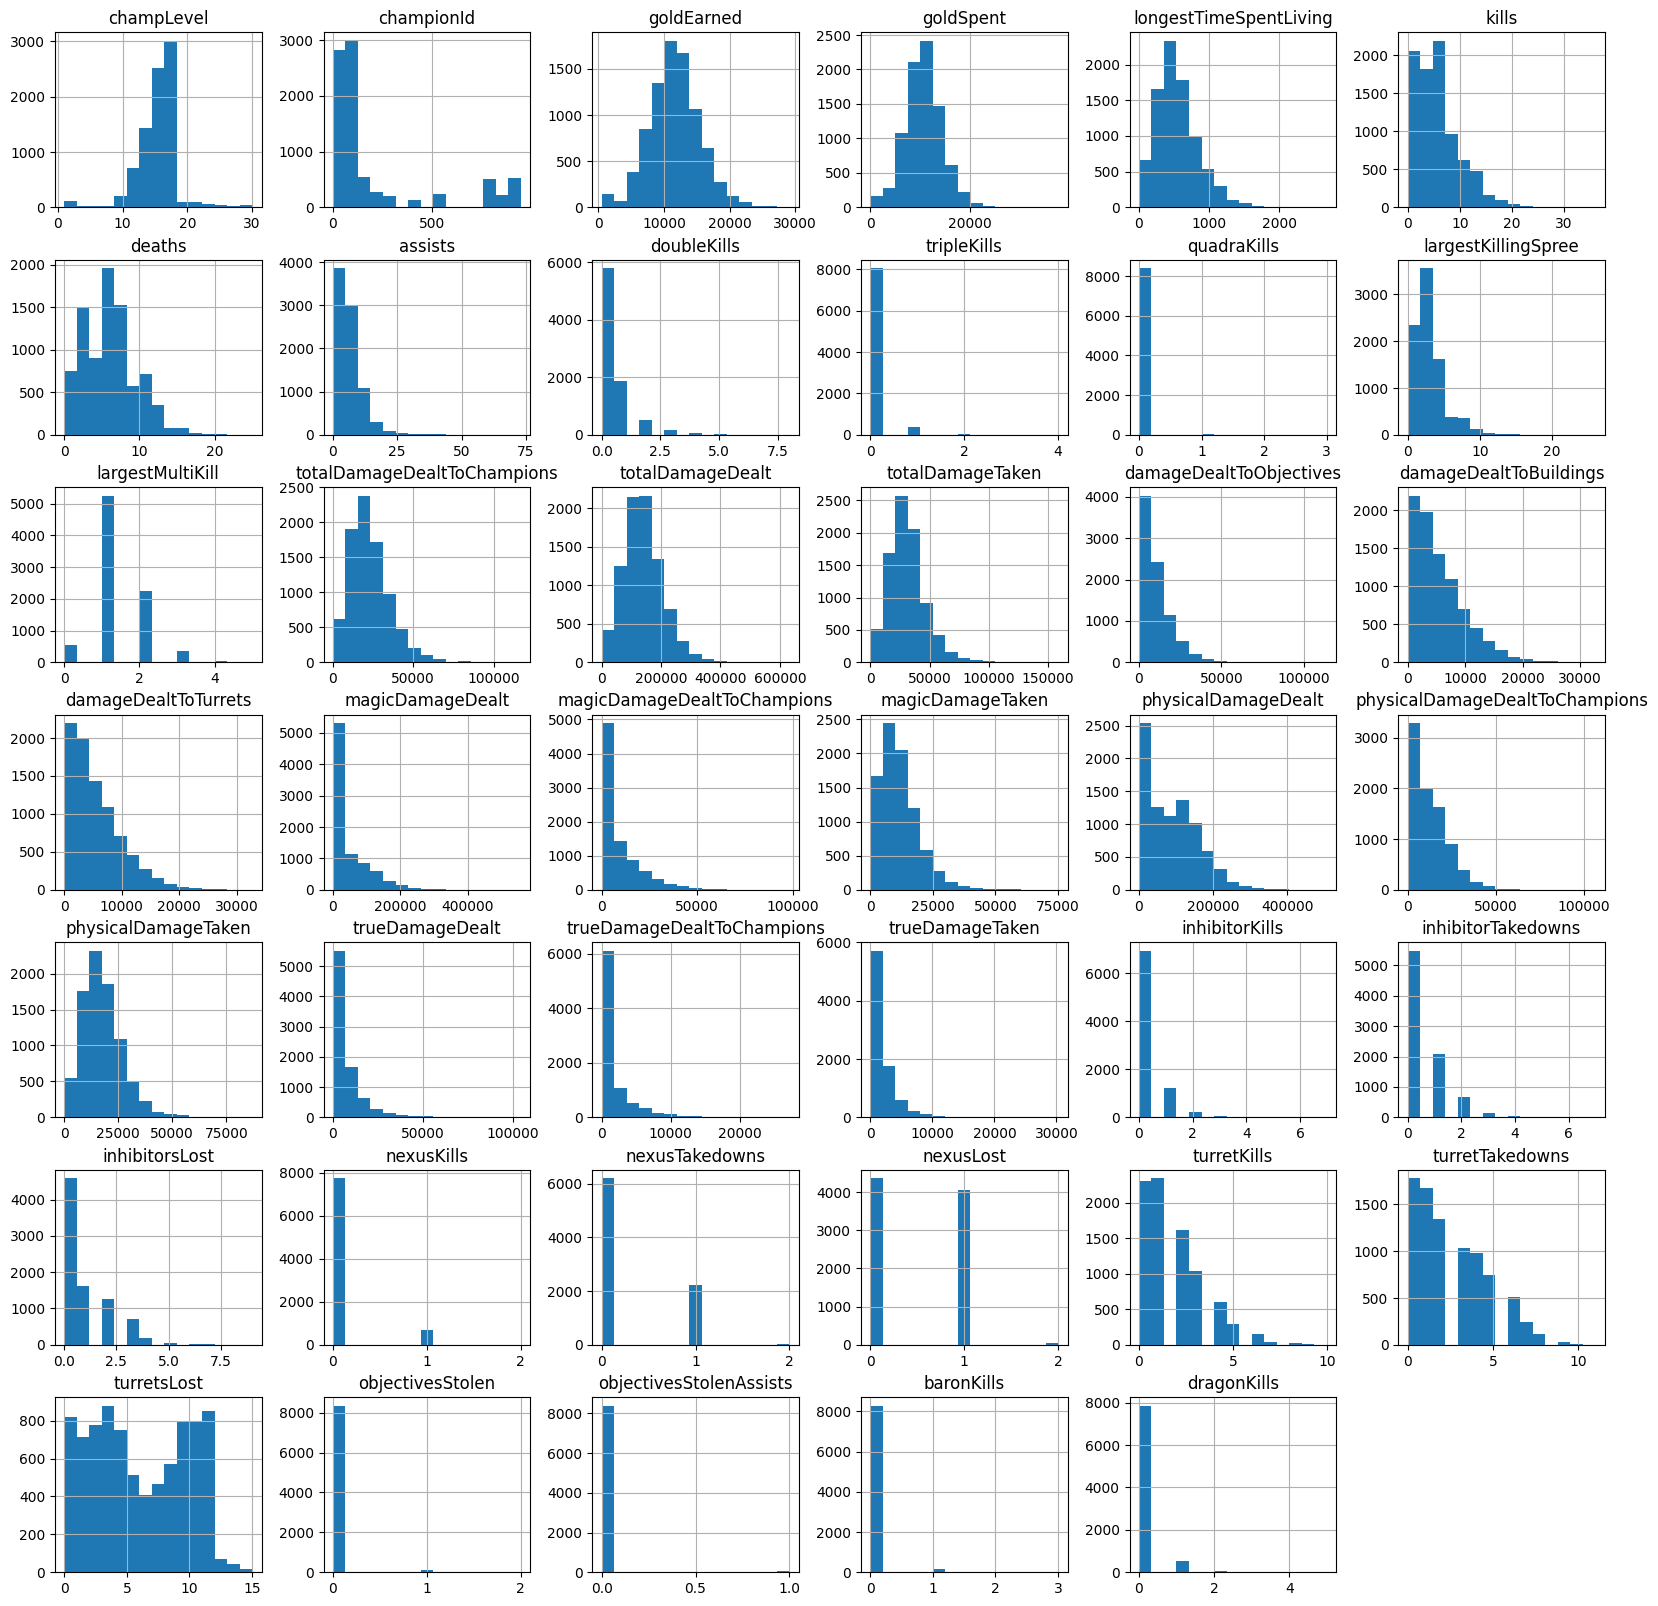

In [66]:
num_feature.hist(bins=15, figsize=(20,20))
plt.show()

In [67]:
# Based on the output we remove the columns that showcases high percent of zero values
for f in num_feature.columns:
    zero = (df[f] == 0).mean()*100
    if zero > 90:
        print(f'{f} has high zero percent.')

tripleKills has high zero percent.
quadraKills has high zero percent.
nexusKills has high zero percent.
objectivesStolen has high zero percent.
objectivesStolenAssists has high zero percent.
baronKills has high zero percent.
dragonKills has high zero percent.


In [68]:
df = df.drop(columns=['tripleKills', 'quadraKills', 'nexusKills', 'objectivesStolen', 'objectivesStolenAssists', 'baronKills', 'dragonKills'])

In [69]:
log_transform_columns = ["trueDamageDealt", "trueDamageDealtToChampions", "trueDamageTaken", "magicDamageDealt",
                            "magicDamageDealtToChampions", "magicDamageTaken", "physicalDamageDealt",
                              "physicalDamageDealtToChampions", "physicalDamageTaken", "damageDealtToBuildings",
                                "damageDealtToObjectives"
]

<Axes: >

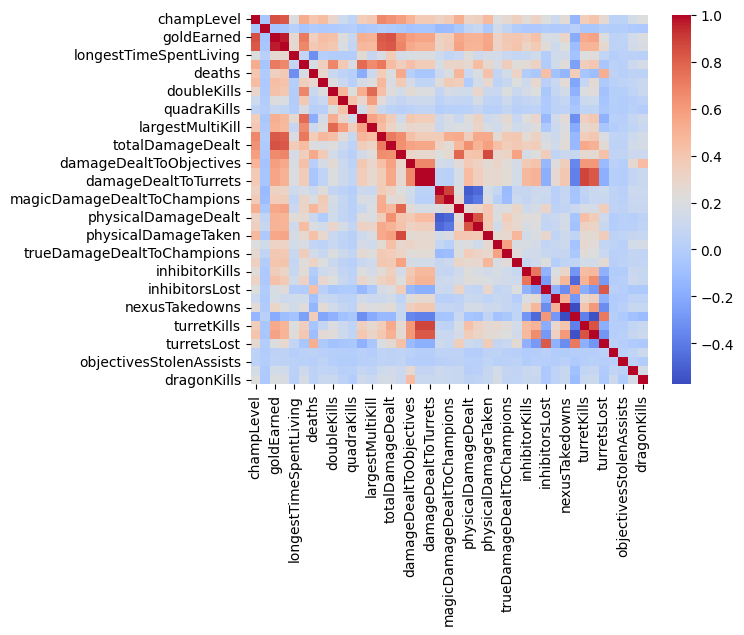

In [70]:
# Correlation between numerical features
sns.heatmap(num_feature.corr(), cmap="coolwarm")

#### Categorical features

In [71]:
cat_feature = df.select_dtypes(include=['object','bool'])
cat_feature.describe()


,uuid,match_id,participants,championName,individualPosition,teamPosition,puuid,summonerId,firstBloodKill,firstBloodAssist,gameEndedInEarlySurrender,gameEndedInSurrender,win
count,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460,8460
unique,8460,8460,8459,168,6,6,6546,6546,2,2,2,2,2
top,EUW1_7283770434_6T8q77Onnnl9q-1osgsqR-Uh_HS7pd...,EUW1_7283770434,[qkKYM3qFy4r4VuWBTR58rxCVnl9Eza3WGbzcYp3S5moZ4...,Garen,TOP,TOP,SSDWZzcdWGfPAJebE_M_pkGril7Vb82826-1Vt5nuTTp6t...,OAniFRXjL1FiCvWEenIsWA22VJwZrtH74Al38MoTuAuZ6D...,False,False,False,False,True
freq,1,1,2,407,7374,7387,18,18,7471,7829,8341,6080,4365


In [72]:
df['teamPosition'].value_counts()

teamPosition
TOP        7387
            842
MIDDLE      134
BOTTOM       56
JUNGLE       21
UTILITY      20
Name: count, dtype: int64

In [73]:
df = df.drop(index=df[df['teamPosition'] == ''].index)

In [74]:
df['teamPosition'].value_counts()

teamPosition
TOP        7387
MIDDLE      134
BOTTOM       56
JUNGLE       21
UTILITY      20
Name: count, dtype: int64

In [75]:
champ_roles = pd.crosstab(df['championName'], df['teamPosition'], margins = False)
champ_roles

teamPosition,BOTTOM,JUNGLE,MIDDLE,TOP,UTILITY
championName,,,,,
Aatrox,0,0,2,188,0
Ahri,0,0,0,4,0
Akali,0,0,2,48,0
Akshan,0,0,3,10,0
Ambessa,2,1,3,270,0
...,...,...,...,...,...
Zed,0,0,3,8,0
Ziggs,0,0,0,1,0
Zilean,0,0,0,12,2


In [76]:
# Mututal information 
from sklearn.metrics import mutual_info_score
for feature in df.select_dtypes(include = ['object', 'bool']).columns:
    print(f"{feature}: ", mutual_info_score(cat_feature['championName'], cat_feature[feature].astype(str)))

uuid:  4.329531856309205
match_id:  4.329531856309205
participants:  4.329367991727513
championName:  4.329531856309206
individualPosition:  0.1944966762625236
teamPosition:  0.19532774517595664
puuid:  4.1250120705841065
summonerId:  4.125012070584107
firstBloodKill:  0.019008002086429398
firstBloodAssist:  0.029330692249027852
gameEndedInEarlySurrender:  0.005599868974949615
gameEndedInSurrender:  0.011751191132682231
win:  0.01151238018482894


In [77]:
# Drop games that ended in Early Surrender
df = df[df['gameEndedInEarlySurrender'] == False]

# Remove players that are AFK
afk_players = df[(df['champLevel'] == 0) | (df['longestTimeSpentLiving'] == 0)]  # Fixed condition
df = df.drop(index=afk_players.index)  # Drop using index
df.shape  # Check the new shape

(7302, 47)

### Feature Transformation

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and champ_list is the 'championName' column
champ_list = df['championName']
df = df.drop(columns = ['gameEndedInEarlySurrender', 'gameEndedInSurrender', 'puuid', 'firstBloodAssist', 'firstBloodKill',
                        'summonerId','win', 'uuid', 'participants', 'match_id'], axis = 1)
# Apply log transformation to specific columns
df[log_transform_columns] = np.log(df[log_transform_columns] + 1)

# Create a new feature 'AP'
df['AP'] = (df['magicDamageDealt'] > df['physicalDamageDealt'])

# Define numerical and categorical feature names
num_features = df.select_dtypes(include=np.number).columns.tolist()

num_features = [f for f in num_features if f != 'championName']

# Categorical features will be the rest of the columns
cat_features = df.drop(columns=num_features + ['championName']).columns.tolist()

# Check for list-like entries in categorical columns and handle them
for column in cat_features:
    # Convert list to a string if column contains lists
    if df[column].apply(lambda x: isinstance(x, list)).any():
        df[column] = df[column].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Define the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # Standardize numerical features
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_features)  # One-hot encode categorical features
    ]
)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline with preprocessing and model steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', model)  # Classifier step
])

# Transform the data
transformed_array = preprocessor.fit_transform(df)

# Get feature names for the transformed data
num_feature_names = num_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)

# Combine the feature names into one list
all_feature_names = num_feature_names + cat_feature_names.tolist()

# Convert transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_array, columns=all_feature_names, index=champ_list.index)

# Check the result
transformed_df

,champLevel,championId,goldEarned,goldSpent,longestTimeSpentLiving,kills,deaths,assists,doubleKills,largestKillingSpree,largestMultiKill,totalDamageDealtToChampions,totalDamageDealt,totalDamageTaken,damageDealtToObjectives,damageDealtToBuildings,damageDealtToTurrets,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,inhibitorKills,inhibitorTakedowns,inhibitorsLost,nexusTakedowns,nexusLost,turretKills,turretTakedowns,turretsLost,individualPosition_BOTTOM,individualPosition_JUNGLE,individualPosition_MIDDLE,individualPosition_TOP,individualPosition_UTILITY,teamPosition_BOTTOM,teamPosition_JUNGLE,teamPosition_MIDDLE,teamPosition_TOP,teamPosition_UTILITY,AP_False,AP_True
0,1.147238,-0.331919,1.743704,1.730215,-0.407138,0.940143,2.718772,1.069494,0.856161,0.173382,2.622628,1.921218,2.501838,1.662366,0.380381,0.659704,1.208882,0.603868,0.709318,1.479265,1.369736,1.186107,0.462074,-0.016732,0.022326,0.737621,1.433240,0.639918,1.745105,1.574613,-0.980349,0.768286,1.126315,0.880216,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.651877,-0.687150,-0.242097,-0.260733,-1.136978,-0.633178,0.731637,-1.334670,-0.554737,-1.126007,-0.446597,-1.082784,0.215443,-0.224371,0.418023,0.416510,0.178550,-2.125228,-2.143307,0.494769,0.860109,0.080981,-0.213220,0.066850,0.567117,-1.245168,-0.411554,-0.628110,0.080691,-0.616701,0.979275,0.149897,-0.269615,0.607026,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.147238,-0.659559,0.934632,1.061668,0.463611,-0.895398,-1.255498,0.348245,-0.554737,-1.126007,-0.446597,-0.102565,1.895404,1.582973,0.690105,0.767028,1.874447,1.000490,0.753554,1.102043,-0.602169,-0.854075,1.166559,1.421910,0.834111,0.443913,1.433240,1.907946,0.080691,-0.616701,-0.980349,2.623452,1.591624,-0.212543,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.651877,1.913275,-0.738976,-0.657453,-0.840706,-0.895398,0.731637,0.107828,-0.554737,-1.126007,-0.446597,-0.515334,-0.368185,-0.620865,-0.041536,0.316015,-0.108748,0.339490,0.300786,-1.183761,0.347748,0.341816,0.277984,0.839949,0.577118,-0.294488,-0.411554,-0.628110,0.912898,-0.616701,0.979275,-0.468492,-0.734924,0.880216,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.247680,-0.580236,0.006057,-0.016824,2.049748,0.153482,-0.924309,2.271576,-0.554737,0.173382,-0.446597,1.144730,-0.312260,0.239574,-0.296251,-0.773519,-1.151695,0.792089,0.898781,0.558417,-0.473331,0.242542,0.176600,-0.170735,-1.740066,0.749056,-0.411554,-0.628110,-0.751517,-0.616701,-0.980349,-1.086881,-1.200234,-0.758923,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,-1.101656,-0.449180,-0.530847,-0.466440,-0.974390,-0.370958,-1.255498,0.107828,-0.554737,0.173382,-0.446597,-0.614374,-0.561030,-1.390504,0.194476,0.438107,0.249157,-2.125228,-2.143307,-0.148417,0.432631,0.517590,-3.000365,0.555333,0.473463,-3.397458,-0.411554,-0.628110,-0.751517,-0.616701,-0.980349,0.768286,0.661005,-1.305303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8455,-1.101656,-0.569889,-1.348210,-1.399467,-1.407958,-0.108738,-1.255498,-1.094253,-0.554737,1.039642,-0.446597,-0.892065,-1.162075,-0.992742,-0.203069,0.151354,-0.460233,0.686250,0.605602,-4.123993,-1.333411,-0.889717,0.072978,-1.085648,-1.740066,-5.164776,-0.411554,-0.628110,-0.751517,-0.616701,-0.980349,-0.468492,-0.734924,-1.305303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8456,1.147238,-0.566440,1.260262,0.900041,-0.100027,1.464583,0.400448,1.550327,2.267059,0.606512,2.622628,1.258323,1.108231,1.860913,0.259830,0.462859,0.334373,0.378104,0.585933,1.007598,1.094368,1.096965,1.243685,-0.267910,-0.248554,1.345957,-0.411554,1.907946,-0.751517,1.574613,-0.980349,-0.468492,1.126315,0.060647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
845

### Training model


In [79]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Train-test split
X = df.drop(columns=['championName'])   # Transformed features
y = df['championName']  # Target variable (champion name)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model

pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix: ', confusion_matrix)
X

Accuracy: 0.8279
confusion_matrix:  <function confusion_matrix at 0x7fa7b17f6280>


,champLevel,championId,goldEarned,goldSpent,longestTimeSpentLiving,individualPosition,teamPosition,kills,deaths,assists,doubleKills,largestKillingSpree,largestMultiKill,totalDamageDealtToChampions,totalDamageDealt,totalDamageTaken,damageDealtToObjectives,damageDealtToBuildings,damageDealtToTurrets,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,inhibitorKills,inhibitorTakedowns,inhibitorsLost,nexusTakedowns,nexusLost,turretKills,turretTakedowns,turretsLost,AP
0,18,126,17711,16675,487,TOP,TOP,9,14,10,1,3,3,45499,308050,57110,9.316501,9.316501,11119,10.610316,9.514511,10.410486,12.482947,10.364293,9.947504,8.216358,5.476464,8.008366,1,1,3,1,0,3,5,9,False
1,14,23,10765,9900,285,TOP,TOP,3,8,0,0,0,1,10406,161686,28830,9.384882,8.774158,6464,0.000000,0.000000,9.539860,11.966641,9.116908,9.597302,8.360071,7.169350,5.318120,0,0,1,0,1,2,2,8,False
3,18,31,14881,14400,728,TOP,TOP,2,2,7,0,0,1,21857,269229,55920,9.879144,9.555843,14126,12.152324,9.662053,10.076894,10.485200,8.061487,10.312845,10.690011,7.999007,7.609862,1,2,1,0,0,6,6,5,True
4,14,777,9027,8550,367,TOP,TOP,2,8,6,0,0,1,17035,124325,22887,8.550048,8.550048,5166,9.582456,8.151910,8.055475,11.447565,9.411320,9.852036,9.689366,7.200425,6.608001,0,0,2,0,1,1,1,9,False
5,16,54,11633,10730,1167,TOP,TOP,6,3,15,0,3,1,36428,127905,35784,8.087333,6.120297,454,11.342090,10.146434,9.596147,10.615726,9.299267,9.799459,7.951559,0.000000,8.023880,0,0,0,0,0,0,0,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,13,92,9755,9200,330,TOP,TOP,4,2,6,0,3,1,15878,111980,11351,8.978787,8.822322,6783,0.000000,0.000000,8.971067,11.533561,9.609720,8.151910,9.199987,6.878326,2.397895,0,0,0,0,0,3,4,1,False
8455,13,57,6896,6025,210,TOP,TOP,5,2,1,0,5,1,12634,73504,17313,8.256607,8.182839,3578,10.930604,9.168580,5.455321,9.744375,8.021256,9.745722,6.378426,0.000000,0.000000,0,0,0,0,0,1,1,1,True
8456,18,58,16020,13850,572,TOP,TOP,11,7,12,2,4,3,37755,218838,60086,9.097508,8.877521,7168,9.732581,9.102978,9.993374,12.203970,10.263676,10.352842,7.784473,4.634729,8.833754,0,2,0,1,0,1,5,6,False
8457,16,164,12900,12558,252,TOP,TOP,7,10,6,0,0,1,26339,165697,43787,9.393079,8.585786,5354,7.604894,7.604894,9.498297,11.780522,9.649563,10.297892,10.404505,9.084550,6.661855,0,0,3,0,1,2,2,11,False


In [80]:
y

0            Jayce
1       Tryndamere
3          Chogath
4             Yone
5         Malphite
           ...    
8454         Riven
8455        Maokai
8456      Renekton
8457       Camille
8458         Riven
Name: championName, Length: 7302, dtype: object

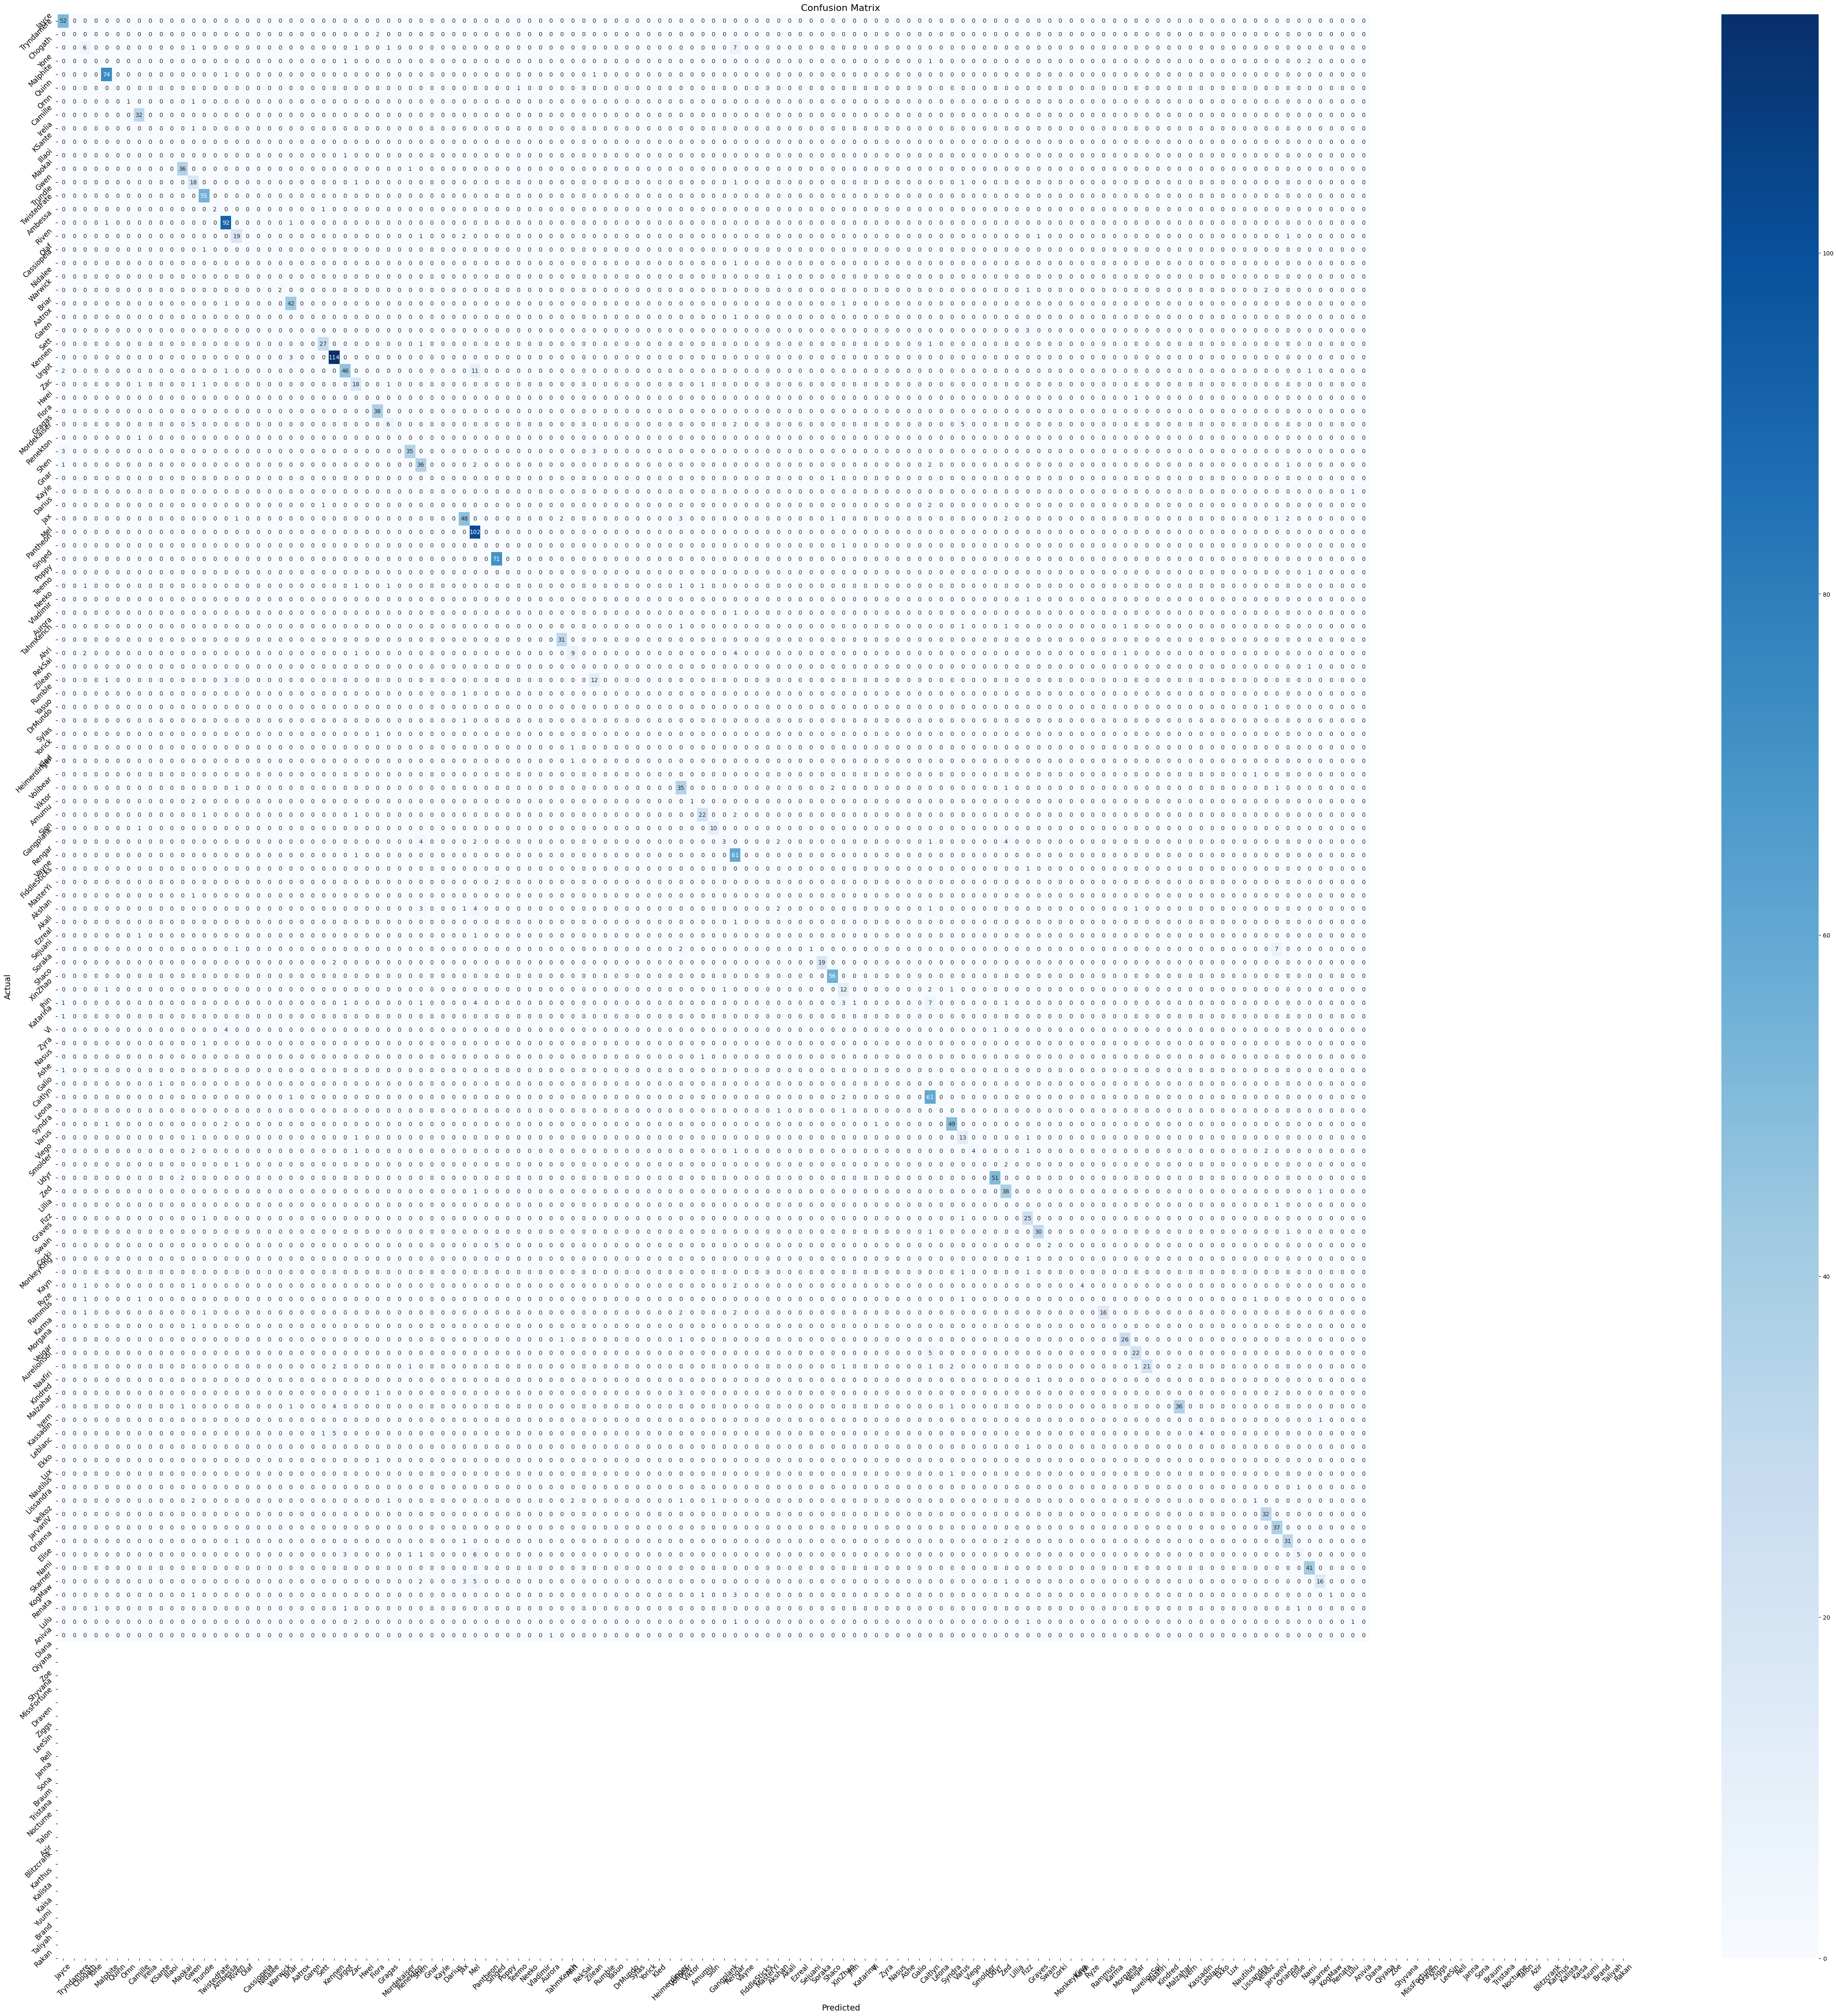

In [81]:
plt.figure(figsize=(60, 60))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
# Set axis labels and title with larger font sizes
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Rotate tick labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.show()

In [83]:
columns = [
    'champLevel', 'championId', 'goldEarned', 'goldSpent', 
    'longestTimeSpentLiving', 'individualPosition', 'teamPosition', 'kills', 'deaths', 'assists',
    'doubleKills', 'largestKillingSpree', 'largestMultiKill', 'totalDamageDealtToChampions',
    'totalDamageDealt', 'totalDamageTaken', 'damageDealtToObjectives', 'damageDealtToBuildings',
    'damageDealtToTurrets', 'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken',
    'physicalDamageDealt', 'physicalDamageDealtToChampions', 'physicalDamageTaken', 'trueDamageDealt',
    'trueDamageDealtToChampions', 'trueDamageTaken', 'inhibitorKills', 'inhibitorTakedowns', 
    'inhibitorsLost', 'nexusTakedowns', 'nexusLost', 'turretKills', 'turretTakedowns', 
    'turretsLost', 'AP'
]
# Test 1
new_data = [
    #'EUW1_7282943064',  # match_id
    #'xwacPtI563NFqJYSLl-3NIgXDW281HAYcp4uej4pEmdsq_',  # participants
    18,  # champLevel
    126,  # championId
    17711,  # goldEarned
    16675,  # goldSpent
    487,  # longestTimeSpentLiving
    'TOP',  # individualPosition
    'TOP',  # teamPosition
    9,  # kills
    10,  # deaths
    1,  # assists
    3,  # doubleKills
    3,  # largestKillingSpree
    3,  # largestMultiKill
    45499,  # totalDamageDealtToChampions
    308050,  # totalDamageDealt
    57110,  # totalDamageTaken
    9.316501,  # damageDealtToObjectives
    9.316501,  # damageDealtToBuildings
    11119,  # damageDealtToTurrets
    10.610316,  # magicDamageDealt
    9.514511,  # magicDamageDealtToChampions
    10.410486,  # magicDamageTaken
    12.482947,  # physicalDamageDealt
    10.364293,  # physicalDamageDealtToChampions
    9.947504,  # physicalDamageTaken
    8.216358,  # trueDamageDealt
    5.476464,  # trueDamageDealtToChampions
    8.008366,  # trueDamageTaken
    1,  # inhibitorKills
    1,  # inhibitorTakedowns
    3,  # inhibitorsLost
    5,  # nexusTakedowns
    9,  # nexusLost
    3,  # turretKills
    10,  # turretTakedowns
    2,  # turretsLost
    1  # AP (based on the example, this seems like a boolean flag for magic damage)
]
# Create a new DataFrame using the data
new_df = pd.DataFrame([new_data], columns=columns)
new_pred = pipeline.predict(new_df)
print(f"Predicted Champion: {new_pred[0]}")

Predicted Champion: Volibear


In [84]:
# Test 2
new_data = [
    #'EUW1_7278340161', 'ZdSws3NbiKvjt6tCr-QtUpB5eoAV8GRxioEp19agNBtGLc...', 
    18, 31, 14881, 14400, 728, 'TOP', 'TOP', 2, 2, 7, 0, 0, 1,
    21857, 269229, 55920, 9.879144, 9.555843, 14126, 12.152324, 9.662053, 10.076894, 10.485200, 8.061487, 10.312845,
    10.690011, 7.999007, 7.609862, 1, 2, 1, 0, 0, 6, 6, 5, True
]
new_df = pd.DataFrame([new_data], columns=columns)
new_pred = pipeline.predict(new_df)
print(f"Predicted Champion: {new_pred[0]}")

Predicted Champion: Chogath
